In [143]:
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


In [144]:
heart=pd.read_csv('heart.csv')
heart

,age,sex,trestbps,chol,restecg,thalach,target
0,52,1,125,212,1,168,0
1,53,1,140,203,0,155,0
2,70,1,145,174,1,125,0
3,61,1,148,203,1,161,0
4,62,0,138,294,1,106,0
...,...,...,...,...,...,...,...
1020,59,1,140,221,1,164,1
1021,60,1,125,258,0,141,0
1022,47,1,110,275,0,118,0
1023,50,0,110,254,0,159,1


In [145]:
info = ["age","1: male, 0: female","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved"]



for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
restecg:			fasting blood sugar > 120 mg/dl
thalach:			resting electrocardiographic results (values 0,1,2)
target:			 maximum heart rate achieved


In [146]:
heart['target']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [147]:
heart.groupby('target').size()

target
0    499
1    526
dtype: int64

In [148]:
heart.groupby('target').sum()

,age,sex,trestbps,chol,restecg,thalach
target,,,,,,
0,28228,413,66919,125395,228,69426
1,27567,300,67983,126755,315,83416


In [149]:
heart.shape

(1025, 7)

In [150]:
heart.size

7175

In [151]:
heart.describe()

,age,sex,trestbps,chol,restecg,thalach,target
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,131.611707,246.00000,0.529756,149.114146,0.513171
std,9.072290,0.460373,17.516718,51.59251,0.527878,23.005724,0.500070
min,29.000000,0.000000,94.000000,126.00000,0.000000,71.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,132.000000,0.000000
50%,56.000000,1.000000,130.000000,240.00000,1.000000,152.000000,1.000000
75%,61.000000,1.000000,140.000000,275.00000,1.000000,166.000000,1.000000
max,77.000000,1.000000,200.000000,564.00000,2.000000,202.000000,1.000000


In [152]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1025 non-null   int64
 1   sex       1025 non-null   int64
 2   trestbps  1025 non-null   int64
 3   chol      1025 non-null   int64
 4   restecg   1025 non-null   int64
 5   thalach   1025 non-null   int64
 6   target    1025 non-null   int64
dtypes: int64(7)
memory usage: 56.2 KB


In [153]:
heart['target'].unique()

array([0, 1], dtype=int64)

In [154]:
#Visualization

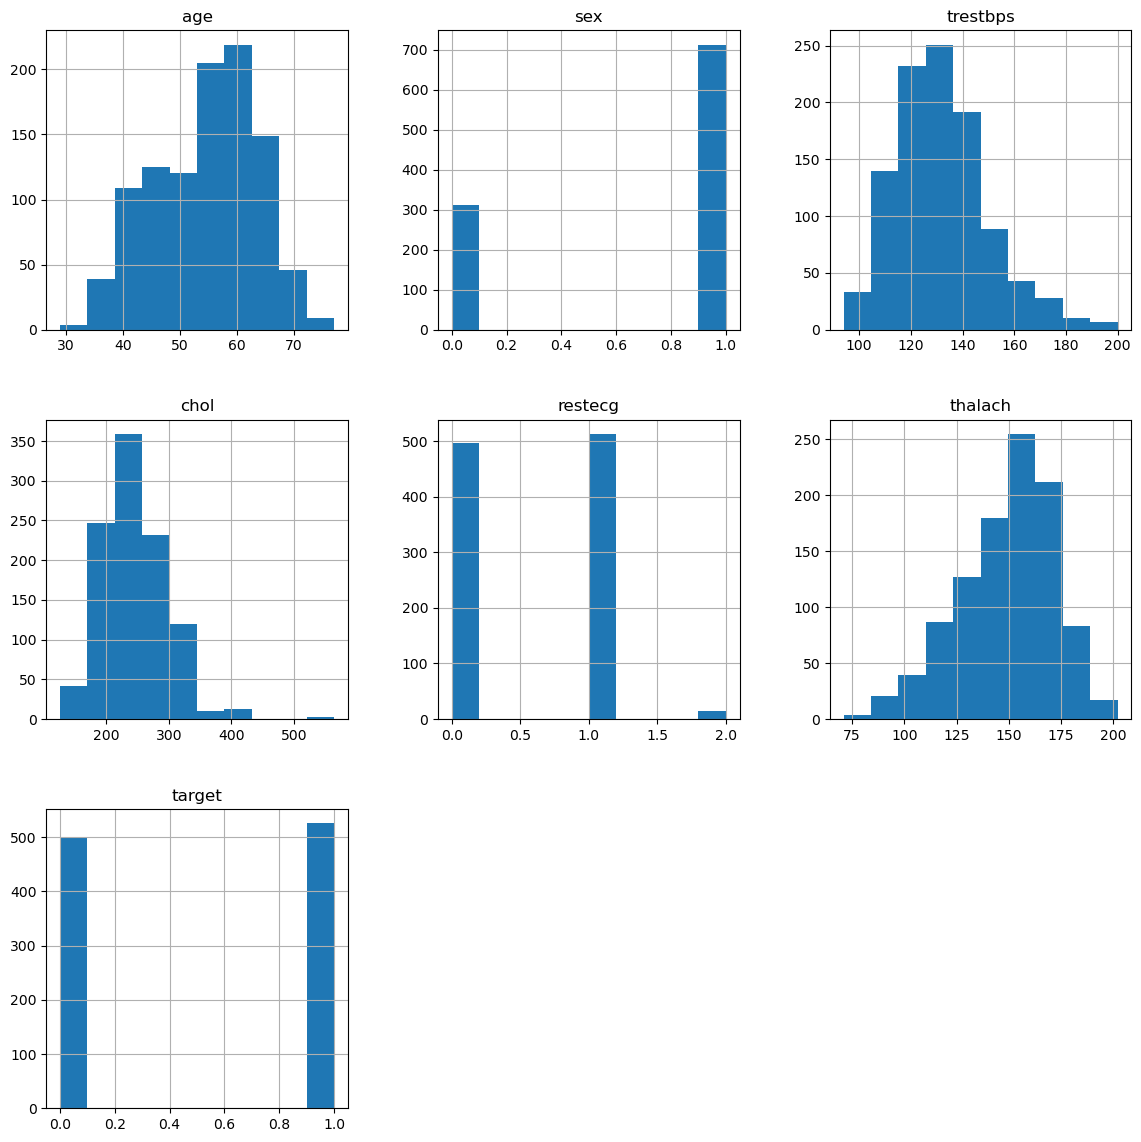

In [155]:
heart.hist(figsize=(14,14))
plt.show()

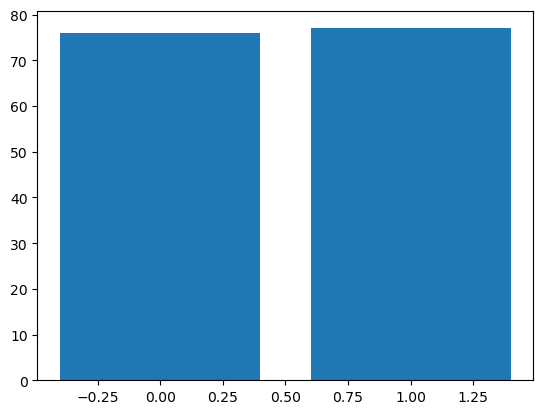

In [156]:
plt.bar(x=heart['sex'],height=heart['age'])
plt.show()

<AxesSubplot:xlabel='sex', ylabel='age'>

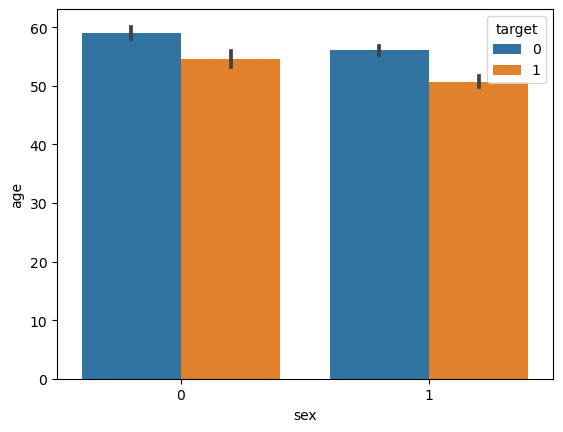

In [157]:
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])

In [158]:
px.bar(heart,heart['sex'],heart['target'])

C:\Users\Ratnam\AppData\Local\Temp\ipykernel_5720\2909701137.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot:xlabel='chol', ylabel='Density'>

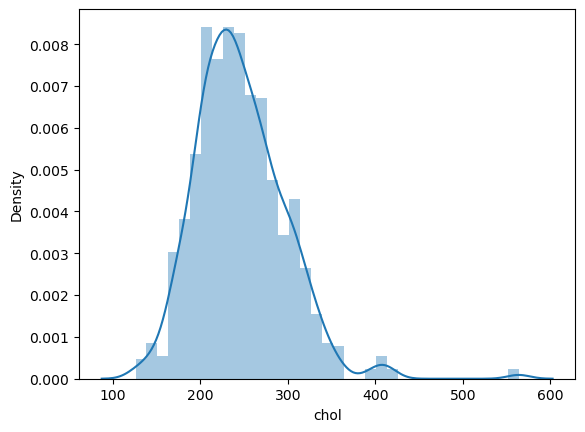

In [159]:
sns.distplot(heart["chol"])

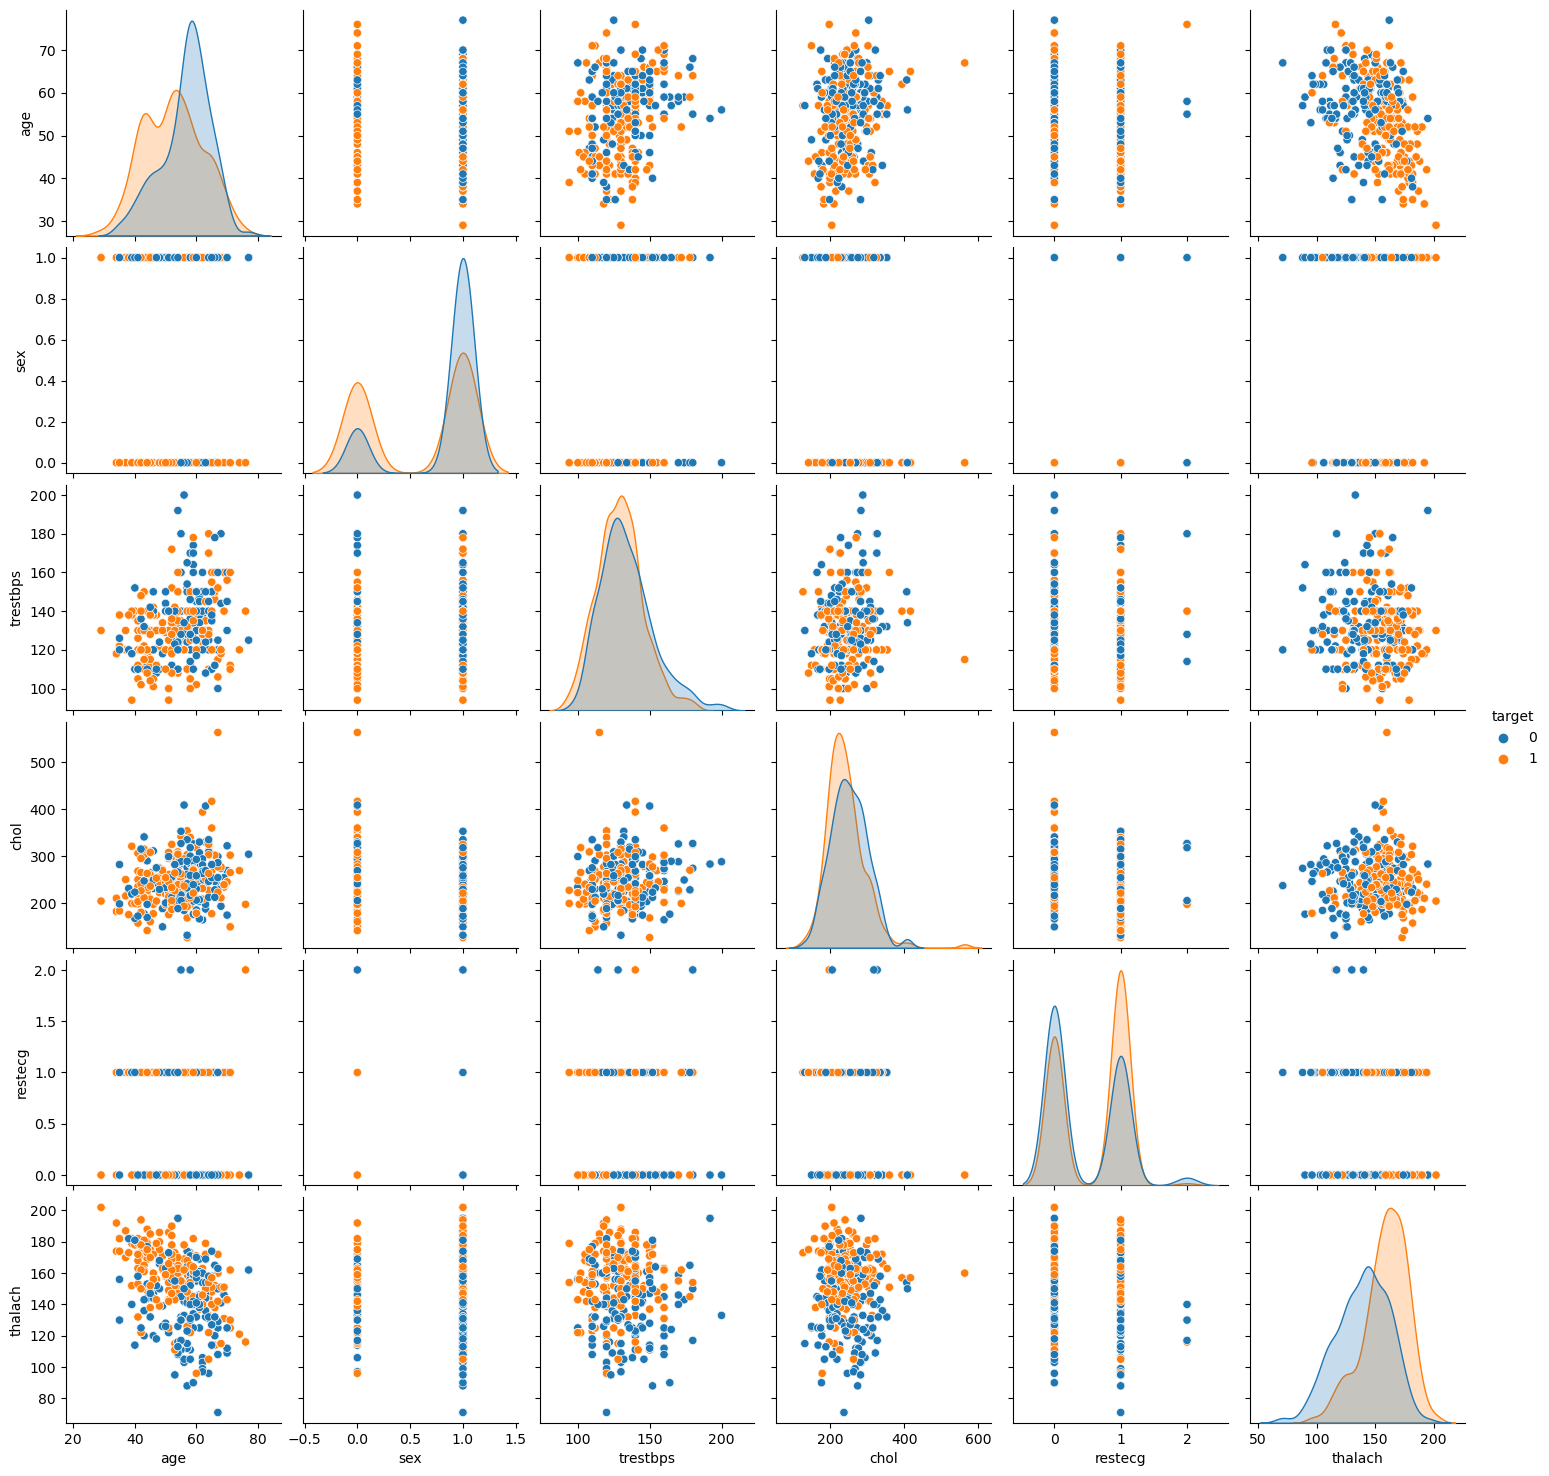

In [161]:
sns.pairplot(heart,hue='target')

In [162]:
heart

,age,sex,trestbps,chol,restecg,thalach,target
0,52,1,125,212,1,168,0
1,53,1,140,203,0,155,0
2,70,1,145,174,1,125,0
3,61,1,148,203,1,161,0
4,62,0,138,294,1,106,0
...,...,...,...,...,...,...,...
1020,59,1,140,221,1,164,1
1021,60,1,125,258,0,141,0
1022,47,1,110,275,0,118,0
1023,50,0,110,254,0,159,1


In [169]:
numeric_columns=['trestbps','chol','thalach','age']

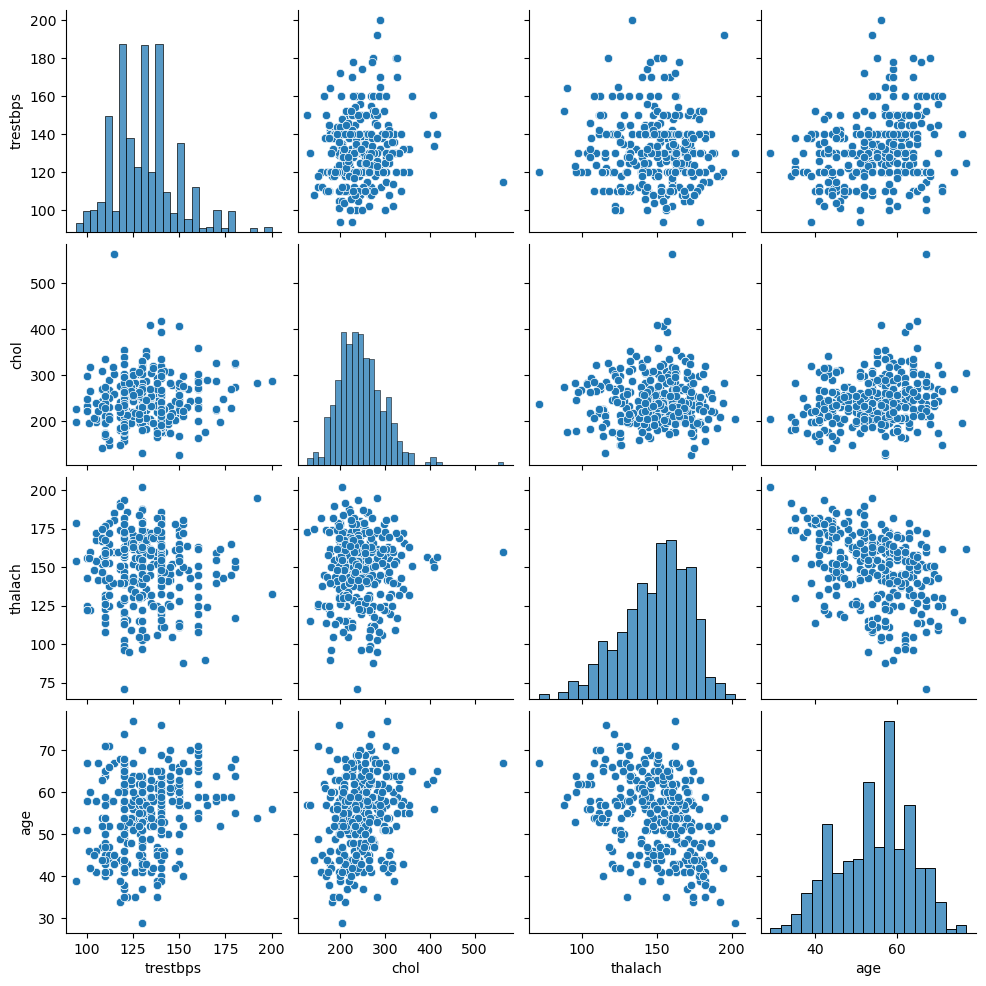

In [170]:
sns.pairplot(heart[numeric_columns])

In [171]:
heart

,age,sex,trestbps,chol,restecg,thalach,target
0,52,1,125,212,1,168,0
1,53,1,140,203,0,155,0
2,70,1,145,174,1,125,0
3,61,1,148,203,1,161,0
4,62,0,138,294,1,106,0
...,...,...,...,...,...,...,...
1020,59,1,140,221,1,164,1
1021,60,1,125,258,0,141,0
1022,47,1,110,275,0,118,0
1023,50,0,110,254,0,159,1


1    526
0    499
Name: target, dtype: int64


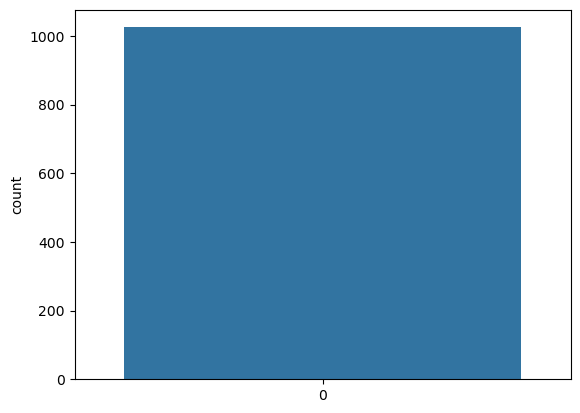

In [172]:
y = heart["target"]

sns.countplot(y)

target_temp = heart.target.value_counts()

print(target_temp)


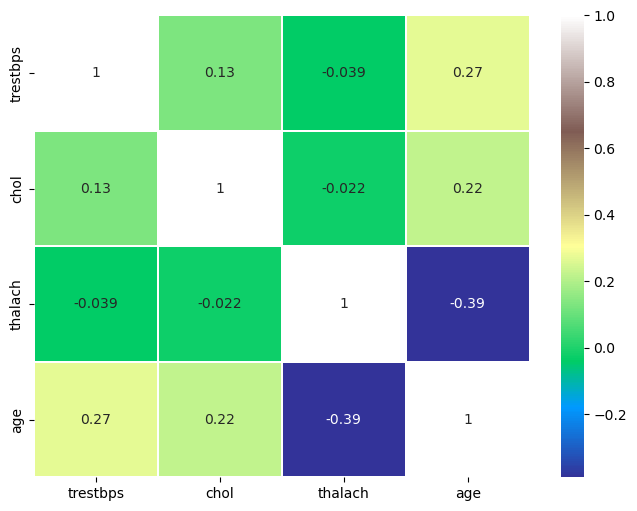

In [173]:
# create a correlation heatmap
sns.heatmap(heart[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

C:\Users\Ratnam\AppData\Local\Temp\ipykernel_5720\2929698976.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Ratnam\AppData\Local\Temp\ipykernel_5720\2929698976.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Ratnam\AppData\Local\Temp\ipykernel_5720\2929698976.py:10: UserWarning:



`distplot` i

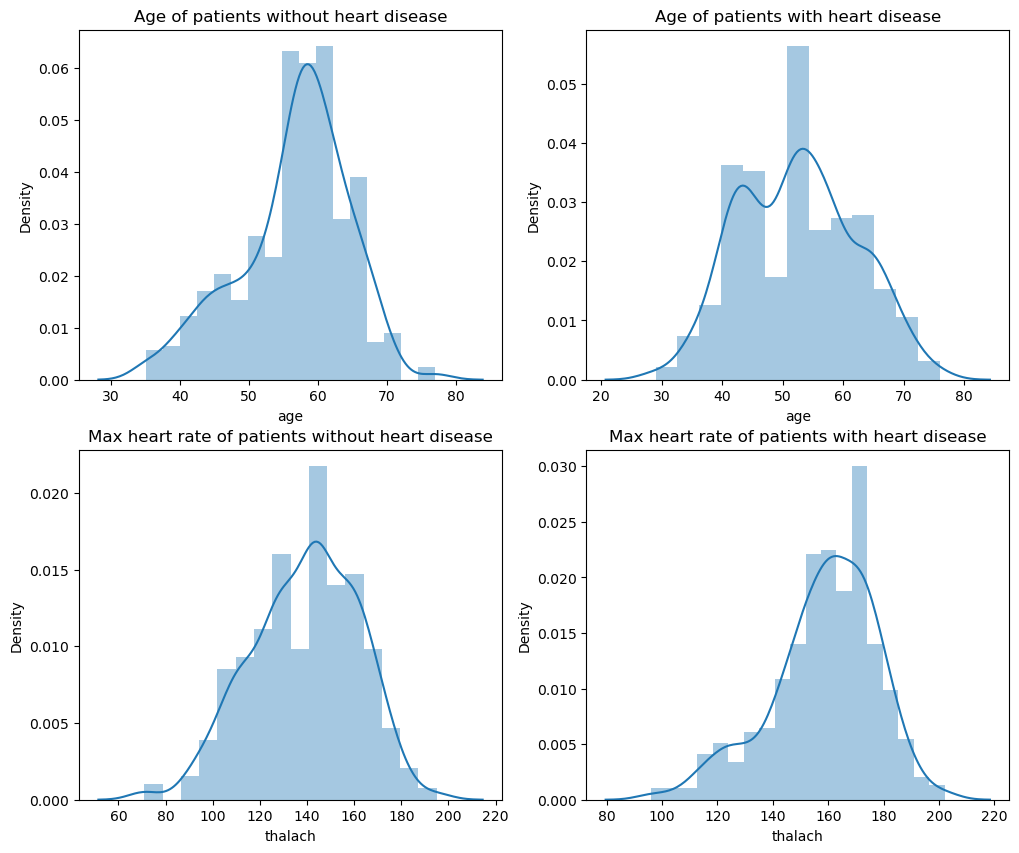

In [168]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [174]:
heart

,age,sex,trestbps,chol,restecg,thalach,target
0,52,1,125,212,1,168,0
1,53,1,140,203,0,155,0
2,70,1,145,174,1,125,0
3,61,1,148,203,1,161,0
4,62,0,138,294,1,106,0
...,...,...,...,...,...,...,...
1020,59,1,140,221,1,164,1
1021,60,1,125,258,0,141,0
1022,47,1,110,275,0,118,0
1023,50,0,110,254,0,159,1


ValueError: Could not interpret input 'testbps'

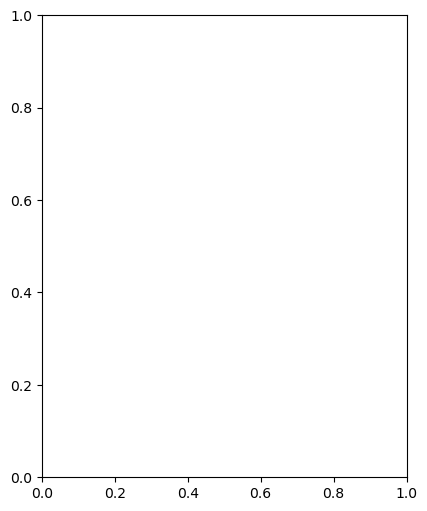

In [176]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='testbps', data=heart)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=heart)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=heart)
plt.show()

In [34]:
#DATA Preprocessing

In [35]:
########################################################################################

In [36]:
heart['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [37]:
heart['target'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1020    False
1021    False
1022    False
1023    False
1024    False
Name: target, Length: 1025, dtype: bool

In [38]:
heart['target'].sum()

526

In [39]:
heart['target'].unique()

array([0, 1], dtype=int64)

In [40]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [41]:
#Storing in X and y

In [42]:
X,y=heart,heart.target

In [43]:
X.drop('target',axis=1,inplace=True)

In [44]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [45]:
####Or X, y = heart.iloc[:, :-1], heart.iloc[:, -1]

In [46]:
X.shape

(1025, 13)

In [47]:
y.shape

(1025,)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [51]:
X_test

array([[ 0.28296121,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168],
       [ 1.05491812,  0.66150409,  1.99930453, ..., -0.6241209 ,
        -0.73197147, -0.52212231],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -0.6241209 ,
         2.17981673, -0.52212231],
       ...,
       [ 1.27547724,  0.66150409, -0.91575542, ...,  0.99543334,
        -0.73197147, -2.1340963 ],
       [-0.04787747,  0.66150409,  1.02761788, ..., -0.6241209 ,
        -0.73197147,  1.08985168],
       [ 1.38575679,  0.66150409, -0.91575542, ..., -0.6241209 ,
         1.20922066,  1.08985168]])

In [52]:
y_test


620    0
181    1
546    0
618    1
822    0
      ..
964    1
242    1
757    1
157    1
999    0
Name: target, Length: 308, dtype: int64

In [53]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (717, 13)
train_set_y shape: (717,)
test_set_x shape: (308, 13)
test_set_y shape: (308,)


In [54]:
# Model

In [55]:
# Decision Tree Classifier
scores_dict = {}

In [56]:
Catagory=['No....but i pray you get Heart Disease or at leaset Corona Virus Soon...','Yes you have Heart Disease....RIP in Advance']

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [59]:
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(accuracy_dt)

96.42857142857143


In [60]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.964


In [61]:
prediction

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

In [62]:
X_DT=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_DT_prediction=dt.predict(X_DT)

In [63]:
X_DT_prediction[0]


0

In [64]:
print(Catagory[int(X_DT_prediction[0])])

No....but i pray you get Heart Disease or at leaset Corona Virus Soon...


In [65]:
#Feature Importance in Decision Trees

In [66]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.0791823  0.02888953 0.25639636 0.05683163 0.1031712  0.
 0.00496497 0.04431008 0.0232841  0.12812509 0.08694819 0.1255462
 0.06235036]


In [67]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [68]:
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(accuracy_dt)

96.42857142857143


In [69]:
#Models
import pickle
pickle.dump(dt,open('model.pkl','wb'))
pickle.dump(sc,open('sc.pkl','wb'))

In [70]:
######Accuracy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,prediction)
confusion_matrix

array([[149,   4],
       [  7, 148]], dtype=int64)